In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

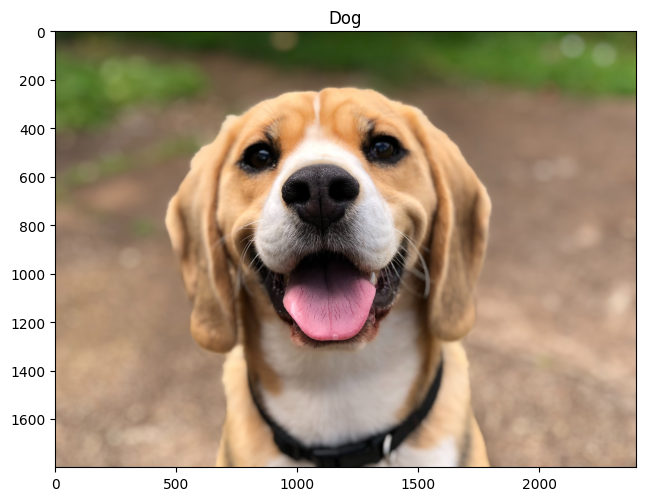

In [3]:
img = cv2.imread('image.jpg')
imshow("Dog", img)

In [4]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Task 1

In [5]:
img_sobel = cv2.Sobel(grey, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


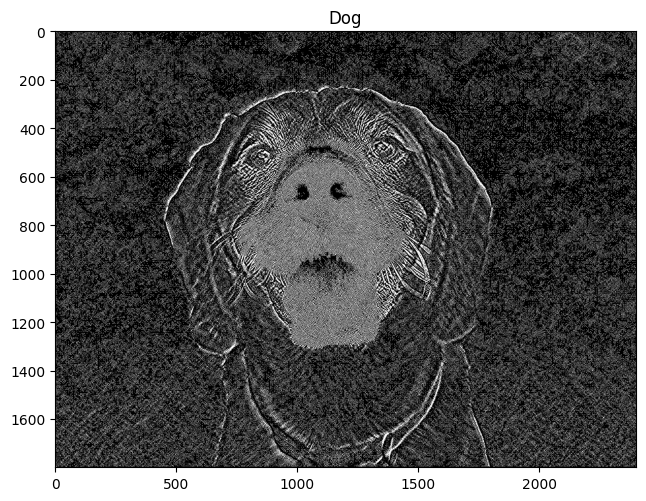

In [6]:
imshow("Dog", img_sobel)

## Task 2

In [7]:
from skimage.feature import hog
from skimage import data, exposure

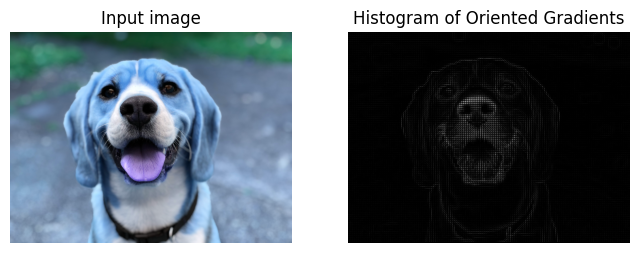

In [8]:
#image = data.astronaut()

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Task 3

In [10]:
from skimage.feature import hog

In [14]:
from sklearn import svm

In [38]:
from sklearn.metrics import accuracy_score

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
from sklearn.utils import shuffle
from skimage import feature

In [24]:
(X_train_img, y_train), (X_test_img, y_test) = cifar10.load_data() # fetch CIFAR-10 data # dirname="."??
y_train = y_train.ravel()
y_test = y_test.ravel()
print(X_train_img.shape)
print(X_test_img.shape)
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [27]:
X_train_img, y_train = shuffle(X_train_img, y_train)
X_test_img, y_test = shuffle(X_test_img, y_test)

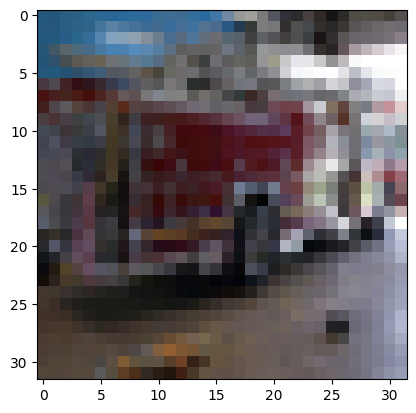

truck


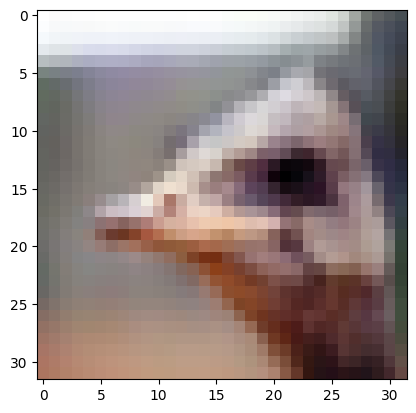

bird


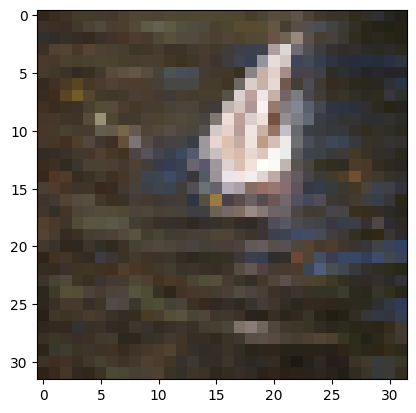

bird


In [28]:
plt.figure()
plt.imshow(X_train_img[0])
plt.show()
print(class_names[y_train[0]])
plt.figure()
plt.imshow(X_train_img[1])
plt.show()
print(class_names[y_train[1]])
plt.figure()
plt.imshow(X_train_img[2])
plt.show()
print(class_names[y_train[2]])

In [29]:
num_train, depth, height, width = X_train_img.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test_img.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

# Produce a [0;1] normalized "image" for potential input into a convNet
X_train_img_norm = X_train_img.astype('float32') 
X_test_img_norm = X_test_img.astype('float32')
X_train_img_norm /= np.max(X_train_img_norm) # Normalise data to [0, 1] range
X_test_img_norm /= np.max(X_train_img_norm) # Normalise data to [0, 1] range

# Rasterize normalized images into 1D vectors for potential input of raw image into standard ML algo such as kNN, MLP, SVM, etc
X_train_vectNorm = X_train_img_norm.reshape(num_train,height*width*depth)
X_test_vectNorm = X_test_img_norm.reshape(num_test,height*width*depth)

print(X_train_vectNorm.shape)
print(X_test_vectNorm.shape)
print(X_train_vectNorm[1:5])

(50000, 3072)
(10000, 3072)
[[1.         1.         1.         ... 0.39607844 0.28627452 0.26666668]
 [0.19215687 0.14509805 0.10588235 ... 0.2        0.1764706  0.13333334]
 [0.6        0.654902   0.78039217 ... 0.10980392 0.10196079 0.15686275]
 [0.3254902  0.33333334 0.3137255  ... 0.41568628 0.49803922 0.39215687]]


In [32]:
linear_svm = svm.SVC(kernel='linear')

In [45]:
n_training = len(X_train_vectNorm )
n_testing = len(X_test_vectNorm )

In [48]:
def rgb2gray(image):
    import cv2
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

Xdata_training = [ rgb2gray(X_train_img[i]) for i in range(n_training)]
Xdata_testing  = [ rgb2gray(X_test_img[i]) for i in range(n_testing)]

In [54]:
normalize = True          #  True ==> yields a little bit better score
                          #  
block_norm = 'L2-Hys'     # or 'L1'
orientations = 9          # 
pixels_per_cell = [8, 8]  #  see section 'Additional remarks' for some explanation
cells_per_block = [2, 2]  # 

def extractFeature(img, vis=False):
    from skimage.feature import hog
    return hog(img, orientations, pixels_per_cell, cells_per_block, block_norm, transform_sqrt=normalize)

In [58]:
nfeatures = extractFeature(Xdata_training[0]).size
print('Number of features = {}'.format(nfeatures))

Number of features = 324


In [60]:
X_training = np.array( [ extractFeature(Xdata_training[i], vis=False) for i in range(n_training) ] )
y_training = np.array( [ y_train[i] for i in range(n_training) ] )

In [61]:
X_testing = np.array( [ extractFeature(Xdata_testing[i], vis=False) for i in range(n_testing) ] )
y_testing = np.array( [ y_test[i] for i in range(n_testing) ] )

In [62]:
linear_svm.fit(X_training, y_training)

SVC(kernel='linear')

In [63]:
predicted = linear_svm.predict(X_testing)


In [64]:
#pred =predicted.argmax(axis=1)
accuracy = accuracy_score(y_testing, predicted)
print(accuracy)

0.5391


In [66]:
from sklearn.metrics import recall_score

In [69]:
print(recall_score(y_testing, predicted, average='micro'))

0.5391


In [70]:
from sklearn.metrics import precision_score

In [71]:
precision_score(y_testing, predicted, average='micro')

0.5391

In [72]:
from sklearn.metrics import f1_score

In [73]:
f1_score(y_testing, predicted, average='micro')

0.5391

## Task 4

In [75]:
from skimage.feature import SIFT

In [76]:
descriptor_extractor = SIFT()

In [77]:
sift = cv2.SIFT_create()

In [92]:
def extractFeatureSift(img):
    kp, des = sift.detectAndCompute(img, None)
    return des


In [93]:
X_training_sift = np.array( [ extractFeatureSift(Xdata_training[i]) for i in range(n_training) ] )
y_training_sift = np.array( [ y_train[i] for i in range(n_training) ] )

C:\Users\HEWLLET\AppData\Local\Temp\ipykernel_8864\1262752311.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_training_sift = np.array( [ extractFeatureSift(Xdata_training[i]) for i in range(n_training) ] )


In [94]:
X_testing_sift = np.array( [ extractFeatureSift(Xdata_testing[i]) for i in range(n_testing) ] )
y_testing_sift = np.array( [ y_test[i] for i in range(n_testing) ] )

C:\Users\HEWLLET\AppData\Local\Temp\ipykernel_8864\584340608.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_testing_sift = np.array( [ extractFeatureSift(Xdata_testing[i]) for i in range(n_testing) ] )


In [95]:
linear_svm_sift = svm.SVC(kernel='linear')

In [96]:
linear_svm_sift.fit(X_training_sift, y_training_sift)

ValueError: setting an array element with a sequence.